In [1]:
from __future__ import print_function

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb

# paraméterek:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 2

print('Adatok betöltése...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'tanító adat')
print(len(x_test), 'teszt adat')

Adatok betöltése...
17473536/17464789 [==============================] - 0s 0us/step
25000 tanító adat
25000 teszt adat


In [2]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 2,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 

In [5]:
print('A minták maxlen hosszúra történő kiegészítése (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

A minták maxlen hosszúra történő kiegészítése (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [6]:
print('Modell felépítése...')
model = Sequential()

# A "vocab" indexek beágyazásával kezdjük
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))

# a Convolution1D réteg célja, hogy betanulja az egymás utáni szócsoportokat
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
 
# maxpooling
model.add(GlobalMaxPooling1D())

# és sima előre csatolt réteg
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# bináris osztályozás - pozitív vagy negatív szentiment
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Modell felépítése...


In [7]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

Epoch 1/2
625/625 [==============================] - 38s 12ms/step - loss: 0.4425 - accuracy: 0.7697 - val_loss: 0.2845 - val_accuracy: 0.8854
Epoch 2/2
625/625 [==============================] - 7s 11ms/step - loss: 0.2378 - accuracy: 0.9053 - val_loss: 0.2687 - val_accuracy: 0.8952


In [8]:
print(model.evaluate(x_test, y_test))

782/782 [==============================] - 4s 5ms/step - loss: 0.2726 - accuracy: 0.8848
[0.2726198732852936, 0.8848000168800354]


In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix

preds = model.predict(x_test)
y_pred = np.round(preds)

conf=confusion_matrix(y_test, y_pred)
print(conf)

[[11365  1135]
 [ 1745 10755]]


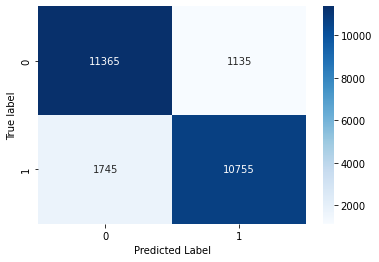

In [10]:
import seaborn as sns
ax = sns.heatmap(conf, annot=True, fmt='d', cmap='Blues') # a vmax paraméterrel állítjuk be, hogy milyen értéktartományban jelenítse meg az adatokat
ax.set(xlabel='Predicted Label',
       ylabel='True label');